In [1]:
import numpy as np
import pandas as pd

from algorithm.util.directed_graph import DirectedGraph
from algorithm.util.read_pairs_data import read_data_db
from algorithm.util.graph_vis import GraphVisualization
from algorithm.edmonds import EdmondsAlgorithm
from algorithm.first_accept_n_way import FirstAcceptNWay
from algorithm.priority_based_n_way import PriorityBasedNWay

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

import time

In [2]:
# data distribution
base_data_date = "2021/01/"
data = []

for i in range(1, 31):
    data_date = base_data_date + str(i).zfill(2)
    data.append(read_data_db(data_date))
    
data = pd.concat(data, axis=0)
data.head()

,pair_num,donor_bloodtype,recipient_bloodtype,pra
0,100,A,B,50
1,P0,A,O,90
2,P1,B,A,5
3,P2,A,O,90
4,P3,A,A,92


In [3]:
data.groupby(["donor_bloodtype", "recipient_bloodtype"]).size()

donor_bloodtype  recipient_bloodtype
A                A                      142
                 AB                      19
                 B                      314
                 O                      945
AB               A                      104
                 B                       39
                 O                      117
B                A                      310
                 AB                      10
                 B                       29
                 O                      390
O                A                      187
                 AB                      39
                 B                       81
                 O                      275
dtype: int64

In [4]:
edmond_matches = []
fa3_matches = []
fa10_matches = []
fa3e_matches = []
fa10e_matches = []
pb3i_matches = []
pb10i_matches = []
pb3g_matches = []
pb10g_matches = []

edmond_time = []
fa3_time = []
fa10_time = []
fa3e_time = []
fa10e_time = []
pb3i_time = []
pb10i_time = []
pb3g_time = []
pb10g_time = []

edmond_maxlen = []
fa3_maxlen = []
fa10_maxlen = []
fa3e_maxlen = []
fa10e_maxlen = []
pb3i_maxlen = []
pb10i_maxlen = []
pb3g_maxlen = []
pb10g_maxlen = []

edmond_avglen = []
fa3_avglen = []
fa10_avglen = []
fa3e_avglen = []
fa10e_avglen = []
pb3i_avglen = []
pb10i_avglen = []
pb3g_avglen = []
pb10g_avglen = []

In [5]:
def avg(lst):
    return sum(lst)/len(lst)

In [6]:
def get_stats(graph, exchanger):
    start = time.time()
    exchanger.finalize_exchange(graph)
    end = time.time()
    lengths = [len(x) for x in exchanger.cycles]
    
    return {
        "time": (1000*(end-start)),
        "matches": exchanger.get_num_of_matched_pairs(),
        "maxlen": max(lengths),
        "avglen": avg(lengths),
    }

In [7]:
for i in range(1, 31):
    date_data = "2021_01_" + str(i).zfill(2)
    pairs_data = read_data_db(date_data)
    grph = DirectedGraph(pairs_data)
    
    # Baseline = Edmond's Algorithm
    edmond = EdmondsAlgorithm(priority_threshold=100)
    edmond_stats = get_stats(grph, edmond)
    edmond_matches.append(edmond_stats["matches"])
    edmond_time.append(edmond_stats["time"])
    edmond_maxlen.append(edmond_stats["maxlen"])
    edmond_avglen.append(edmond_stats["avglen"])
    
    # First Accept N Way with n = 3
    fanway3 = FirstAcceptNWay(3, 'maximum')
    fa3_stats = get_stats(grph, fanway3)
    fa3_matches.append(fa3_stats["matches"])
    fa3_time.append(fa3_stats["time"])
    fa3_maxlen.append(fa3_stats["maxlen"])
    fa3_avglen.append(fa3_stats["avglen"])
    
    # First Accept N Way with n = 10
    fanway10 = FirstAcceptNWay(10, 'maximum')
    fa10_stats = get_stats(grph, fanway10)
    fa10_matches.append(fa10_stats["matches"])
    fa10_time.append(fa10_stats["time"])
    fa10_maxlen.append(fa10_stats["maxlen"])
    fa10_avglen.append(fa10_stats["avglen"])
    
    # First Accept N Way with n = 3
    fanway3e = FirstAcceptNWay(3, 'exact')
    fa3e_stats = get_stats(grph, fanway3e)
    fa3e_matches.append(fa3e_stats["matches"])
    fa3e_time.append(fa3e_stats["time"])
    fa3e_maxlen.append(fa3e_stats["maxlen"])
    fa3e_avglen.append(fa3e_stats["avglen"])
    
    # First Accept N Way with n = 10
    fanway10e = FirstAcceptNWay(10, 'exact')
    fa10e_stats = get_stats(grph, fanway10e)
    fa10e_matches.append(fa10e_stats["matches"])
    fa10e_time.append(fa10e_stats["time"])
    fa10e_maxlen.append(fa10e_stats["maxlen"])
    fa10e_avglen.append(fa10e_stats["avglen"])
    
    # Priority Based N Way with n = 3 and infrequent priority
    pbnway3 = PriorityBasedNWay(3, 'maximum', 'infrequent')
    pb3i_stats = get_stats(grph, pbnway3)
    pb3i_matches.append(pb3i_stats["matches"])
    pb3i_time.append(pb3i_stats["time"])
    pb3i_maxlen.append(pb3i_stats["maxlen"])
    pb3i_avglen.append(pb3i_stats["avglen"])
    
    # Priority Based N Way with n = 10 and infrequent priority
    pbnway10 = PriorityBasedNWay(10, 'maximum', 'infrequent')
    pb10i_stats = get_stats(grph, pbnway10)
    pb10i_matches.append(pb10i_stats["matches"])
    pb10i_time.append(pb10i_stats["time"])
    pb10i_maxlen.append(pb10i_stats["maxlen"])
    pb10i_avglen.append(pb10i_stats["avglen"])
    
    # Priority Based N Way with n = 3 and greedy priority
    pbnway3g = PriorityBasedNWay(3, 'maximum', 'greedy')
    pb3g_stats = get_stats(grph, pbnway3g)
    pb3g_matches.append(pb3g_stats["matches"])
    pb3g_time.append(pb3g_stats["time"])
    pb3g_maxlen.append(pb3g_stats["maxlen"])
    pb3g_avglen.append(pb3g_stats["avglen"])
    
    # Priority Based N Way with n = 10 and greedy priority
    pbnway10g = PriorityBasedNWay(10, 'maximum', 'greedy')
    pb10g_stats = get_stats(grph, pbnway10g)
    pb10g_matches.append(pb10g_stats["matches"])
    pb10g_time.append(pb10g_stats["time"])
    pb10g_maxlen.append(pb10g_stats["maxlen"])
    pb10g_avglen.append(pb10g_stats["avglen"])

In [8]:
# matches
matches_all = {
    "algo": [],
    "seed": [],
    "matches": [],
    "maxlen": [],
    "avglen": [],
}

In [9]:
for idx, e in enumerate(edmond_matches):
    matches_all['algo'].append("Baseline: Edmond")
    matches_all["matches"].append(e)
    matches_all["seed"].append(idx)
    
for idx, e in enumerate(fa3_matches):
    matches_all['algo'].append("First Accept(N=3, Method=Max)")
    matches_all["matches"].append(e)
    matches_all["seed"].append(idx)
    
for idx, e in enumerate(fa10_matches):
    matches_all['algo'].append("First Accept(N=10, Method=Max)")
    matches_all["matches"].append(e)
    matches_all["seed"].append(idx)
    
for idx, e in enumerate(fa3e_matches):
    matches_all['algo'].append("First Accept(N=3, Method=Exact)")
    matches_all["matches"].append(e)
    matches_all["seed"].append(idx)
    
for idx, e in enumerate(fa10e_matches):
    matches_all['algo'].append("First Accept(N=10, Method=Exact)")
    matches_all["matches"].append(e)
    matches_all["seed"].append(idx)
    
for idx, e in enumerate(pb3i_matches):
    matches_all['algo'].append("Priority Based(N=3, Priority=Infrequent)")
    matches_all["matches"].append(e)
    matches_all["seed"].append(idx)
    
for idx, e in enumerate(pb10i_matches):
    matches_all['algo'].append("Priority Based(N=10, Priority=Infrequent)")
    matches_all["matches"].append(e)
    matches_all["seed"].append(idx)
    
for idx, e in enumerate(pb3g_matches):
    matches_all['algo'].append("Priority Based(N=3, Priority=Greedy)")
    matches_all["matches"].append(e)
    matches_all["seed"].append(idx)
    
for idx, e in enumerate(pb10g_matches):
    matches_all['algo'].append("Priority Based(N=10, Priority=Greedy)")
    matches_all["matches"].append(e)
    matches_all["seed"].append(idx)

In [10]:
for e in edmond_maxlen:
    matches_all["maxlen"].append(e)
    
for e in fa3_maxlen:
    matches_all["maxlen"].append(e)
    
for e in fa10_maxlen:
    matches_all["maxlen"].append(e)
    
for e in fa3e_maxlen:
    matches_all["maxlen"].append(e)
    
for e in fa10e_maxlen:
    matches_all["maxlen"].append(e)
    
for e in pb3i_maxlen:
    matches_all["maxlen"].append(e)
    
for e in pb10i_maxlen:
    matches_all["maxlen"].append(e)
    
for e in pb3g_maxlen:
    matches_all["maxlen"].append(e)
    
for e in pb10g_maxlen:
    matches_all["maxlen"].append(e)

In [11]:
for e in edmond_avglen:
    matches_all["avglen"].append(e)
    
for e in fa3_avglen:
    matches_all["avglen"].append(e)
    
for e in fa10_avglen:
    matches_all["avglen"].append(e)
    
for e in fa3e_avglen:
    matches_all["avglen"].append(e)
    
for e in fa10e_avglen:
    matches_all["avglen"].append(e)
    
for e in pb3i_avglen:
    matches_all["avglen"].append(e)
    
for e in pb10i_avglen:
    matches_all["avglen"].append(e)
    
for e in pb3g_avglen:
    matches_all["avglen"].append(e)
    
for e in pb10g_avglen:
    matches_all["avglen"].append(e)

In [12]:
len(matches_all["avglen"])

270

In [13]:
matches_all = pd.DataFrame(matches_all)
matches_all.head()

,algo,seed,matches,maxlen,avglen
0,Baseline: Edmond,0,36,2,2.0
1,Baseline: Edmond,1,34,2,2.0
2,Baseline: Edmond,2,36,2,2.0
3,Baseline: Edmond,3,46,2,2.0
4,Baseline: Edmond,4,44,2,2.0


In [14]:
matches_all["algo"].value_counts()

First Accept(N=3, Method=Exact)              30
First Accept(N=10, Method=Max)               30
Priority Based(N=10, Priority=Infrequent)    30
Priority Based(N=3, Priority=Greedy)         30
Priority Based(N=10, Priority=Greedy)        30
First Accept(N=3, Method=Max)                30
Priority Based(N=3, Priority=Infrequent)     30
Baseline: Edmond                             30
First Accept(N=10, Method=Exact)             30
Name: algo, dtype: int64

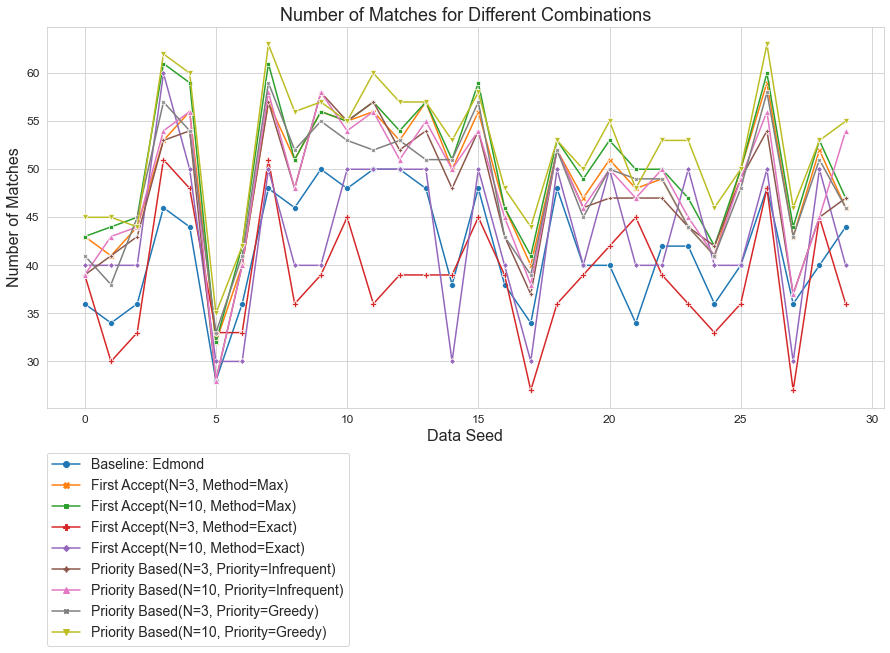

In [36]:
plt.figure(figsize=(15, 7))

plt.title("Number of Matches for Different Combinations", fontsize=18)

sns.lineplot(data=matches_all, x="seed", y="matches", hue="algo", style="algo", markers=True, dashes=False)

plt.xlabel("Data Seed", fontsize=16)
plt.ylabel("Number of Matches", fontsize=16)
plt.legend(bbox_to_anchor=(0.37, -0.1), fontsize=14)
plt.tick_params(labelsize=12)

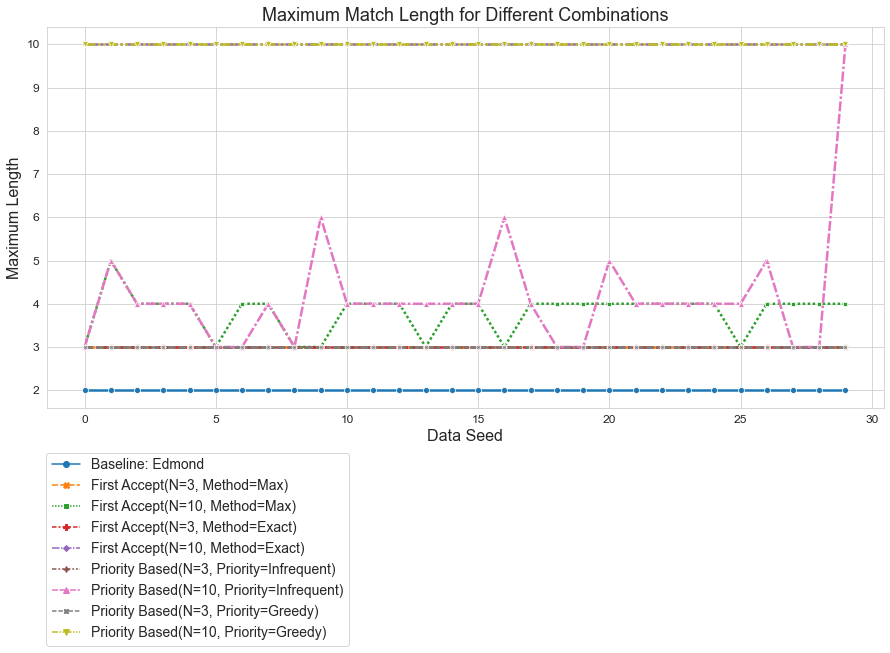

In [33]:
plt.figure(figsize=(15, 7))

plt.title("Maximum Match Length for Different Combinations", fontsize=18)

sns.lineplot(data=matches_all, x="seed", y="maxlen", hue="algo", style="algo", markers=True, dashes=True, linewidth=2.5)

plt.xlabel("Data Seed", fontsize=16)
plt.ylabel("Maximum Length", fontsize=16)
plt.legend(bbox_to_anchor=(0.37, -0.1), fontsize=14)
plt.tick_params(labelsize=12)

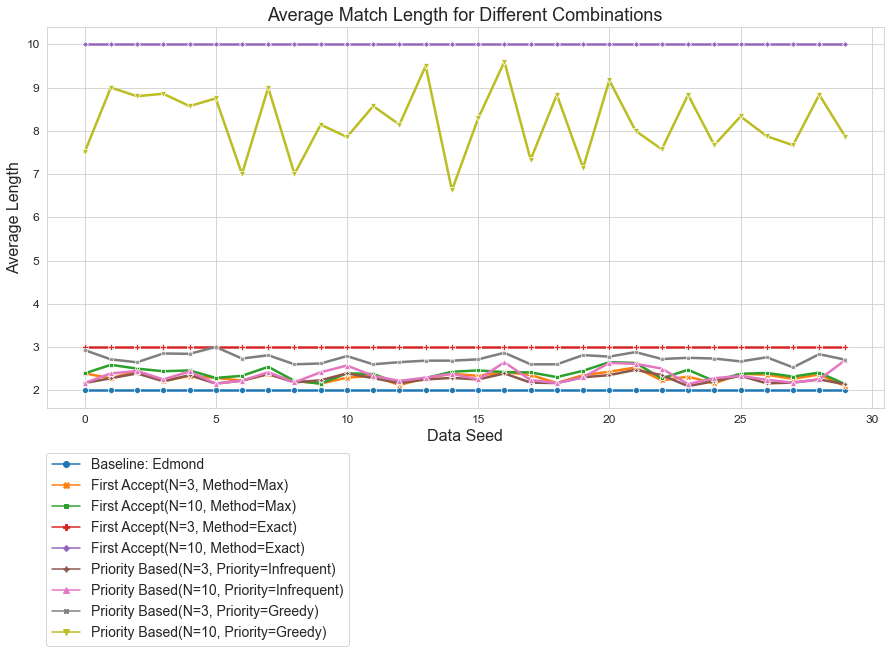

In [32]:
plt.figure(figsize=(15, 7))

plt.title("Average Match Length for Different Combinations", fontsize=18)

sns.lineplot(data=matches_all, x="seed", y="avglen", hue="algo", style="algo", markers=True, dashes=False, linewidth=2.5)

plt.xlabel("Data Seed", fontsize=16)
plt.ylabel("Average Length", fontsize=16)
plt.legend(bbox_to_anchor=(0.37, -0.1), fontsize=14)
plt.tick_params(labelsize=12)

In [18]:
# find average execution time of 50 times execution

edmond_time_accumulative = {}
fa3_time_accumulative = {}
fa10_time_accumulative = {}
pb3i_time_accumulative = {}
pb10i_time_accumulative = {}
pb3g_time_accumulative = {}
pb10g_time_accumulative = {}

for i in range(1, 31):
    edmond_time = []
    fa3_time = []
    fa10_time = []
    pb3i_time = []
    pb10i_time = []
    pb3g_time = []
    pb10g_time = []
    for _ in range(1):
        date_data = "2021_01_" + str(i).zfill(2)
        pairs_data = read_data_db(date_data)
        grph = DirectedGraph(pairs_data)

        # Benchmark = Edmond's Algorithm
        start = time.time()
        edmond = EdmondsAlgorithm(priority_threshold=100)
        edmond.finalize_exchange(grph)
        edmond_end = time.time()
        edmond_time.append(1000*(edmond_end - start))

        # First Accept N Way with n = 3
        fanway3 = FirstAcceptNWay(3, 'maximum')
        fanway3.finalize_exchange(grph)
        fa3_end = time.time()
        fa3_time.append(1000*(fa3_end - edmond_end))

        # First Accept N Way with n = 10
        fanway10 = FirstAcceptNWay(10, 'maximum')
        fanway10.finalize_exchange(grph)
        fa10_end = time.time()
        fa10_time.append(1000*(fa10_end - fa3_end))

        # Priority Based N Way with n = 3 and infrequent priority
        pbnway3 = PriorityBasedNWay(3, 'maximum', 'infrequent')
        pbnway3.finalize_exchange(grph)
        pb3i_end = time.time()
        pb3i_time.append(1000*(pb3i_end - fa10_end))

        # Priority Based N Way with n = 10 and infrequent priority
        pbnway10 = PriorityBasedNWay(10, 'maximum', 'infrequent')
        pbnway10.finalize_exchange(grph)
        pb10i_end = time.time()
        pb10i_time.append(1000*(pb10i_end - pb3i_end))

        # Priority Based N Way with n = 3 and greedy priority
        pbnway3g = PriorityBasedNWay(3, 'maximum', 'greedy')
        pbnway3g.finalize_exchange(grph)
        pb3g_end = time.time()
        pb3g_time.append(1000*(pb3g_end - pb10i_end))

        # Priority Based N Way with n = 10 and greedy priority
        pbnway10g = PriorityBasedNWay(10, 'maximum', 'greedy')
        pbnway10g.finalize_exchange(grph)
        pb10g_end = time.time()
        pb10g_time.append(1000*(pb10g_end - pb3g_end))
    
    edmond_time_accumulative[i] = edmond_time
    fa3_time_accumulative[i] = fa3_time
    fa10_time_accumulative[i] = fa10_time
    pb3i_time_accumulative[i] = pb3i_time
    pb10i_time_accumulative[i] = pb10i_time
    pb3g_time_accumulative[i] = pb3g_time
    pb10g_time_accumulative[i] = pb10g_time

In [19]:
# formula to count average of time dict

def average_time(time_dict):
    return [sum(time_dict[x])/len(time_dict[x]) for x in time_dict]

time_df = pd.DataFrame({
    'Baseline: Edmond': average_time(edmond_time_accumulative),
    'First Accept with N = 3': average_time(fa3_time_accumulative),
    'First Accept with N = 10': average_time(fa10_time_accumulative),
    'Priority Based with N = 3; infrequent': average_time(pb3i_time_accumulative),
    'Priority Based with N = 10; infrequent': average_time(pb10i_time_accumulative),
    'Priority Based with N = 3; greedy': average_time(pb3g_time_accumulative),
    'Priority Based with N = 10; greedy': average_time(pb10g_time_accumulative),
})

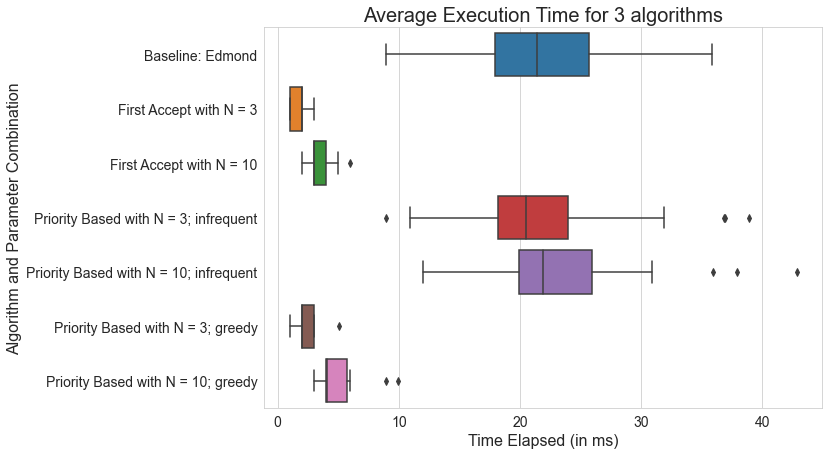

In [20]:
plt.figure(figsize=(10, 7))

plt.title("Average Execution Time for 3 algorithms", fontsize=20)

sns.boxplot(x="value", y="variable", data=pd.melt(time_df))

plt.ylabel("Algorithm and Parameter Combination", fontsize=16)
plt.xlabel("Time Elapsed (in ms)", fontsize=16)
plt.tick_params(labelsize=14)

plt.show()

In [21]:
# First Accept

different_n_0200_0299 = []
different_n_1000_1099 = []
different_n_1500_1599 = []
different_n_2100_2199 = []
different_n_2900_2999 = []

different_e_0200_0299 = []
different_e_1000_1099 = []
different_e_1500_1599 = []
different_e_2100_2199 = []
different_e_2900_2999 = []

pairs_data0 = read_data_db("2021_01_04")
grph0 = DirectedGraph(pairs_data0)

pairs_data1 = read_data_db("2021_01_11")
grph1 = DirectedGraph(pairs_data1)

pairs_data2 = read_data_db("2021_01_16")
grph2 = DirectedGraph(pairs_data2)

pairs_data3 = read_data_db("2021_01_22")
grph3 = DirectedGraph(pairs_data3)

pairs_data4 = read_data_db("2021_01_30")
grph4 = DirectedGraph(pairs_data4)

for n in range(2, 15):
    fanway0 = FirstAcceptNWay(n, 'maximum')
    fanway0.finalize_exchange(grph0)
    different_n_0200_0299.append(fanway0.get_num_of_matched_pairs())
    
    fanway1 = FirstAcceptNWay(n, 'maximum')
    fanway1.finalize_exchange(grph1)
    different_n_1000_1099.append(fanway1.get_num_of_matched_pairs())
    
    fanway2 = FirstAcceptNWay(n, 'maximum')
    fanway2.finalize_exchange(grph2)
    different_n_1500_1599.append(fanway2.get_num_of_matched_pairs())
    
    fanway3 = FirstAcceptNWay(n, 'maximum')
    fanway3.finalize_exchange(grph3)
    different_n_2100_2199.append(fanway3.get_num_of_matched_pairs())  
    
    fanway4 = FirstAcceptNWay(n, 'maximum')
    fanway4.finalize_exchange(grph4)
    different_n_2900_2999.append(fanway4.get_num_of_matched_pairs())
    
    fanwaye1 = FirstAcceptNWay(n, 'exact')
    fanwaye1.finalize_exchange(grph0)
    different_e_0200_0299.append(fanwaye1.get_num_of_matched_pairs())
    
    fanway5 = FirstAcceptNWay(n, 'exact')
    fanway5.finalize_exchange(grph1)
    different_e_1000_1099.append(fanway5.get_num_of_matched_pairs())
    
    fanway6 = FirstAcceptNWay(n, 'exact')
    fanway6.finalize_exchange(grph2)
    different_e_1500_1599.append(fanway6.get_num_of_matched_pairs())
    
    fanway7 = FirstAcceptNWay(n, 'exact')
    fanway7.finalize_exchange(grph3)
    different_e_2100_2199.append(fanway7.get_num_of_matched_pairs())  
    
    fanway8 = FirstAcceptNWay(n, 'exact')
    fanway8.finalize_exchange(grph4)
    different_e_2900_2999.append(fanway8.get_num_of_matched_pairs())

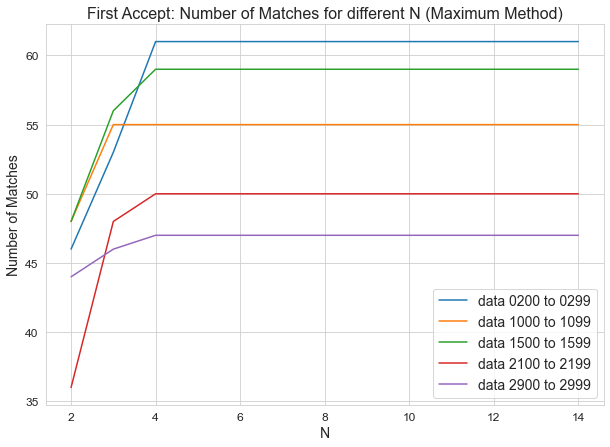

In [22]:
plt.figure(figsize=(10, 7))

plt.title("First Accept: Number of Matches for different N (Maximum Method)", fontsize=16)
plt.xlabel("N", fontsize=14)
plt.ylabel("Number of Matches", fontsize=14)

sns.lineplot(y=different_n_0200_0299, x=range(2,15))
sns.lineplot(y=different_n_1000_1099, x=range(2,15))
sns.lineplot(y=different_n_1500_1599, x=range(2,15))
sns.lineplot(y=different_n_2100_2199, x=range(2,15))
sns.lineplot(y=different_n_2900_2999, x=range(2,15))

plt.legend([
    "data 0200 to 0299",
    "data 1000 to 1099",
    "data 1500 to 1599",
    "data 2100 to 2199",
    "data 2900 to 2999"
], fontsize=14)
plt.tick_params(labelsize=12)

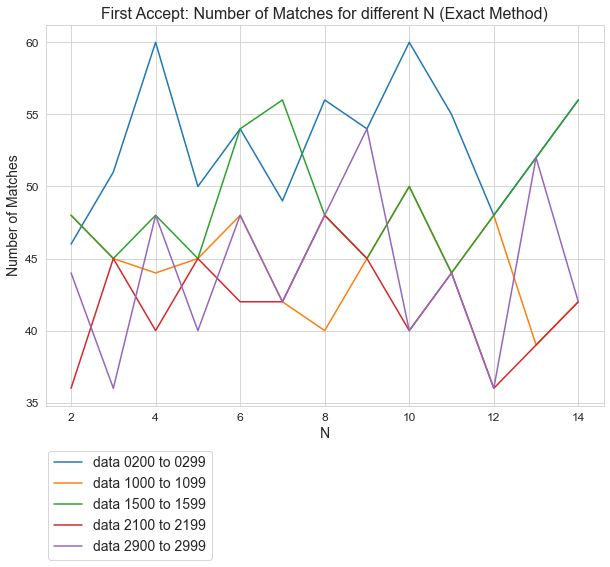

In [23]:
plt.figure(figsize=(10, 7))

plt.title("First Accept: Number of Matches for different N (Exact Method)", fontsize=16)
plt.xlabel("N", fontsize=14)
plt.ylabel("Number of Matches", fontsize=14)


sns.lineplot(y=different_e_0200_0299, x=range(2,15))
sns.lineplot(y=different_e_1000_1099, x=range(2,15))
sns.lineplot(y=different_e_1500_1599, x=range(2,15))
sns.lineplot(y=different_e_2100_2199, x=range(2,15))
sns.lineplot(y=different_e_2900_2999, x=range(2,15))

plt.legend([
    "data 0200 to 0299",
    "data 1000 to 1099",
    "data 1500 to 1599",
    "data 2100 to 2199",
    "data 2900 to 2999"
], fontsize=14, bbox_to_anchor=(0.31, -0.1))
plt.tick_params(labelsize=12)

In [24]:
# Priority Based - Greedy

pb_different_n_0200_0299 = []
pb_different_n_1000_1099 = []
pb_different_n_1500_1599 = []
pb_different_n_2100_2199 = []
pb_different_n_2900_2999 = []

pairs_data0 = read_data_db("2021_01_04")
grph0 = DirectedGraph(pairs_data0)

pairs_data1 = read_data_db("2021_01_11")
grph1 = DirectedGraph(pairs_data1)

pairs_data2 = read_data_db("2021_01_16")
grph2 = DirectedGraph(pairs_data2)

pairs_data3 = read_data_db("2021_01_21")
grph3 = DirectedGraph(pairs_data3)

pairs_data4 = read_data_db("2021_01_30")
grph4 = DirectedGraph(pairs_data4)

for n in range(2, 15):
    pbnway0 = PriorityBasedNWay(n, 'maximum', 'greedy')
    pbnway0.finalize_exchange(grph0)
    pb_different_n_0200_0299.append(pbnway0.get_num_of_matched_pairs())
    
    pbnway1 = PriorityBasedNWay(n, 'maximum', 'greedy')
    pbnway1.finalize_exchange(grph1)
    pb_different_n_1000_1099.append(pbnway1.get_num_of_matched_pairs())
    
    pbnway2 = PriorityBasedNWay(n, 'maximum', 'greedy')
    pbnway2.finalize_exchange(grph2)
    pb_different_n_1500_1599.append(pbnway2.get_num_of_matched_pairs())
    
    pbnway3 = PriorityBasedNWay(n, 'maximum', 'greedy')
    pbnway3.finalize_exchange(grph3)
    pb_different_n_2100_2199.append(pbnway3.get_num_of_matched_pairs())  
    
    pbnway4 = PriorityBasedNWay(n, 'maximum', 'greedy')
    pbnway4.finalize_exchange(grph4)
    pb_different_n_2900_2999.append(pbnway4.get_num_of_matched_pairs())

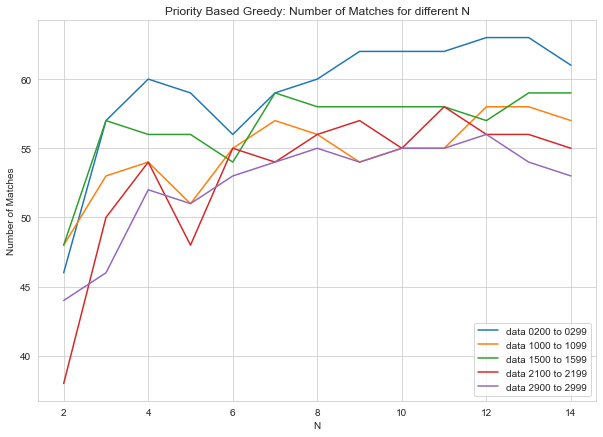

In [25]:
plt.figure(figsize=(10, 7))

plt.title("Priority Based Greedy: Number of Matches for different N")
plt.xlabel("N")
plt.ylabel("Number of Matches")

sns.lineplot(y=pb_different_n_0200_0299, x=range(2,15))
sns.lineplot(y=pb_different_n_1000_1099, x=range(2,15))
sns.lineplot(y=pb_different_n_1500_1599, x=range(2,15))
sns.lineplot(y=pb_different_n_2100_2199, x=range(2,15))
sns.lineplot(y=pb_different_n_2900_2999, x=range(2,15))

plt.legend([
    "data 0200 to 0299",
    "data 1000 to 1099",
    "data 1500 to 1599",
    "data 2100 to 2199",
    "data 2900 to 2999"
])

In [26]:
# Priority Based - Infrequent

pb_different_n_0200_0299 = []
pb_different_n_1000_1099 = []
pb_different_n_1500_1599 = []
pb_different_n_2100_2199 = []
pb_different_n_2900_2999 = []

pairs_data0 = read_data_db("2021_01_04")
grph0 = DirectedGraph(pairs_data0)

pairs_data1 = read_data_db("2021_01_11")
grph1 = DirectedGraph(pairs_data1)

pairs_data2 = read_data_db("2021_01_16")
grph2 = DirectedGraph(pairs_data2)

pairs_data3 = read_data_db("2021_01_21")
grph3 = DirectedGraph(pairs_data3)

pairs_data4 = read_data_db("2021_01_30")
grph4 = DirectedGraph(pairs_data4)

for n in range(2, 15):
    pbnway0 = PriorityBasedNWay(n, 'maximum', 'infrequent')
    pbnway0.finalize_exchange(grph0)
    pb_different_n_0200_0299.append(pbnway0.get_num_of_matched_pairs())
    
    pbnway1 = PriorityBasedNWay(n, 'maximum', 'infrequent')
    pbnway1.finalize_exchange(grph1)
    pb_different_n_1000_1099.append(pbnway1.get_num_of_matched_pairs())
    
    pbnway2 = PriorityBasedNWay(n, 'maximum', 'infrequent')
    pbnway2.finalize_exchange(grph2)
    pb_different_n_1500_1599.append(pbnway2.get_num_of_matched_pairs())
    
    pbnway3 = PriorityBasedNWay(n, 'maximum', 'infrequent')
    pbnway3.finalize_exchange(grph3)
    pb_different_n_2100_2199.append(pbnway3.get_num_of_matched_pairs())  
    
    pbnway4 = PriorityBasedNWay(n, 'maximum', 'infrequent')
    pbnway4.finalize_exchange(grph4)
    pb_different_n_2900_2999.append(pbnway4.get_num_of_matched_pairs())

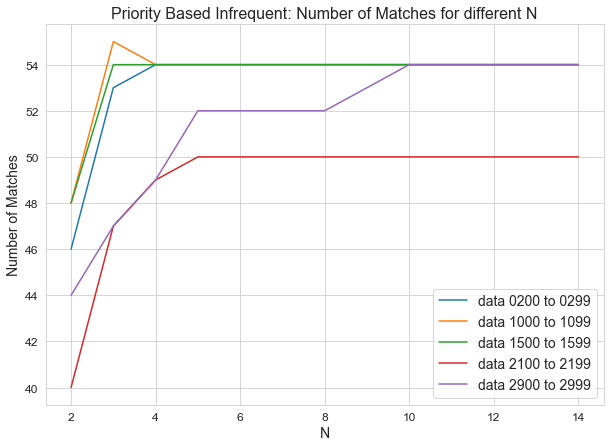

In [27]:
plt.figure(figsize=(10, 7))

plt.title("Priority Based Infrequent: Number of Matches for different N", fontsize=16)
plt.xlabel("N", fontsize=14)
plt.ylabel("Number of Matches", fontsize=14)

sns.lineplot(y=pb_different_n_0200_0299, x=range(2,15))
sns.lineplot(y=pb_different_n_1000_1099, x=range(2,15))
sns.lineplot(y=pb_different_n_1500_1599, x=range(2,15))
sns.lineplot(y=pb_different_n_2100_2199, x=range(2,15))
sns.lineplot(y=pb_different_n_2900_2999, x=range(2,15))

plt.legend([
    "data 0200 to 0299",
    "data 1000 to 1099",
    "data 1500 to 1599",
    "data 2100 to 2199",
    "data 2900 to 2999"
], fontsize=14)
plt.tick_params(labelsize=12)

In [28]:
# First Accept - Maximum vs Exact

fa = {}

for d in ["2021_01_05", "2021_01_15", "2021_01_20", "2021_01_25"]:
    data = read_data_db(d)
    grph = DirectedGraph(data)
    fa[d] = {}
    for n in range(2, 15):
        fa[d][n] = {}
        for g in ['maximum', 'exact']:
            firstaccept = FirstAcceptNWay(n, g)
            firstaccept.finalize_exchange(grph)
            
            fa[d][n][g] = firstaccept.get_num_of_matched_pairs()

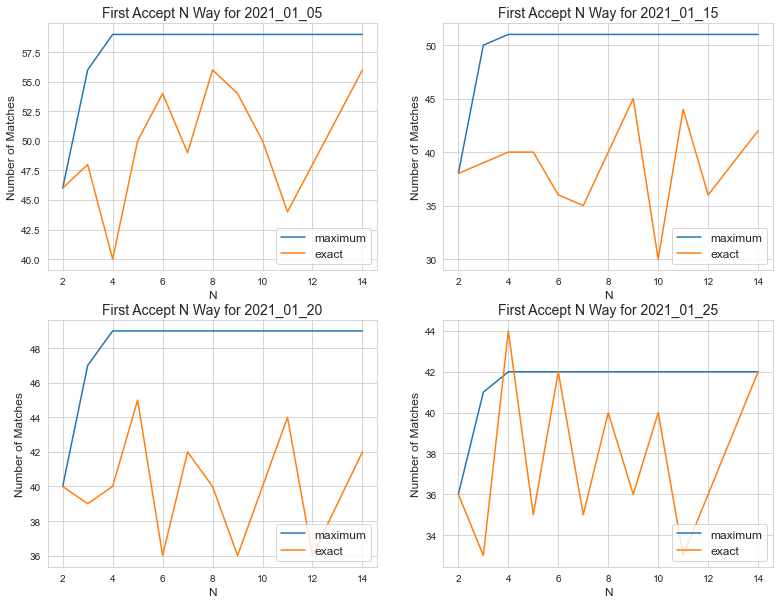

In [29]:
plt.figure(figsize=(13, 10))

for idx, date in enumerate(fa):
    plt.subplot(2, 2, idx+1)
    n = list(fa[date].keys())
    gr = [a['maximum'] for a in fa[date].values()]
    iq = [a['exact'] for a in fa[date].values()]
    plt.title("First Accept N Way for " + date, fontsize=14)
    plt.xlabel("N", fontsize=12)
    plt.ylabel("Number of Matches", fontsize=12)
    
    sns.lineplot(y=gr, x=n)
    sns.lineplot(y=iq, x=n)
    
    plt.legend(['maximum', 'exact'], loc=4, fontsize=12)

In [30]:
# Priority Based - Infrequent vs Greedy

pb = {}

for d in ["2021_01_05", "2021_01_15", "2021_01_20", "2021_01_25"]:
    data = read_data_db(d)
    grph = DirectedGraph(data)
    pb[d] = {}
    for n in range(2, 15):
        pb[d][n] = {}
        for g in ['greedy', 'infrequent']:
            prio = PriorityBasedNWay(n, 'maximum', g)
            prio.finalize_exchange(grph)
            
            pb[d][n][g] = prio.get_num_of_matched_pairs()

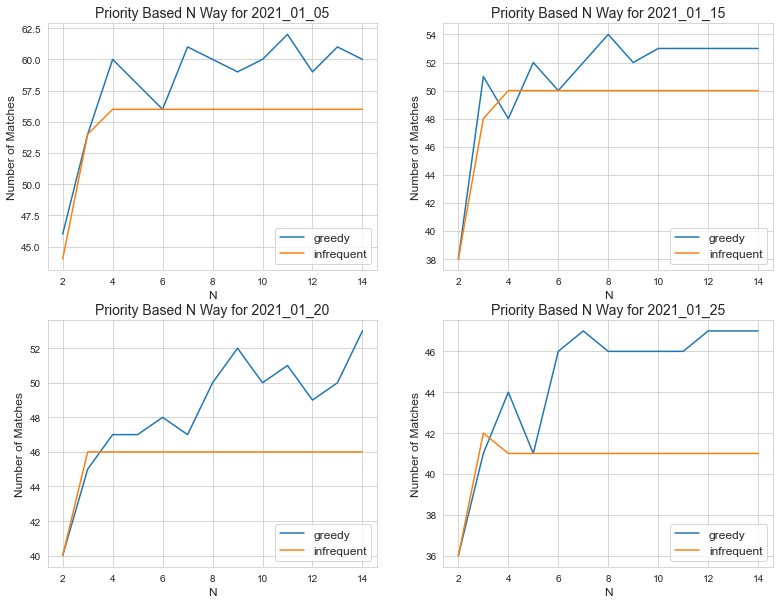

In [31]:
plt.figure(figsize=(13, 10))

for idx, date in enumerate(pb):
    plt.subplot(2, 2, idx+1)
    n = list(pb[date].keys())
    gr = [a['greedy'] for a in pb[date].values()]
    iq = [a['infrequent'] for a in pb[date].values()]
    plt.title("Priority Based N Way for " + date, fontsize=14)
    plt.xlabel("N", fontsize=12)
    plt.ylabel("Number of Matches", fontsize=12)
    
    sns.lineplot(y=gr, x=n)
    sns.lineplot(y=iq, x=n)
    
    plt.legend(['greedy', 'infrequent'], loc=4, fontsize=12)